# Polynomial Regression

## Example 1: Salary Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('../data/employee_salary.csv')
df.head(n=3)

,Years of Experience,Salary
0,1.000000,40000.00000
1,2.257942,65979.42119
2,2.450875,67253.57549


In [3]:
df.describe()

,Years of Experience,Salary
count,2000.000000,2000.000000
mean,10.739095,111942.422469
std,2.989853,45055.817085
min,1.000000,40000.000000
25%,8.812255,87938.130895
50%,10.738822,93376.356875
75%,12.785483,116978.641550
max,20.000000,500000.000000


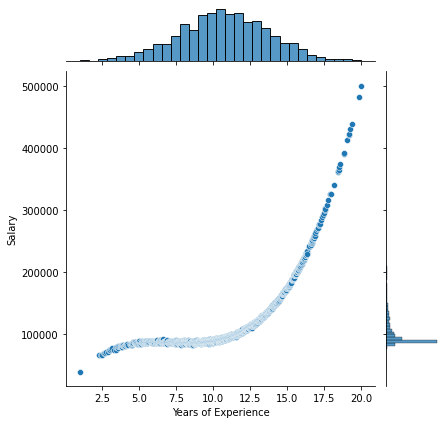

In [4]:
sns.jointplot(x='Years of Experience', y='Salary', data=df);

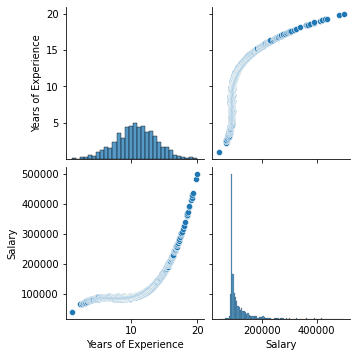

In [5]:
sns.pairplot(df);

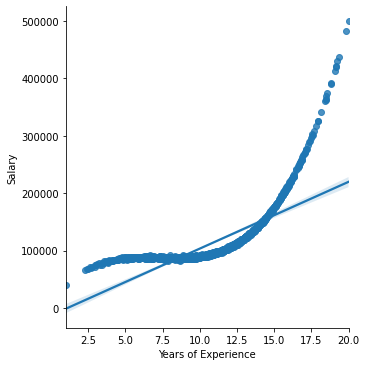

In [6]:
sns.lmplot(x='Years of Experience', y='Salary', data=df);

In [7]:
from sklearn.model_selection import train_test_split

X = df[['Years of Experience']]
y = df['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [8]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression(fit_intercept=False).fit(X_train, y_train)

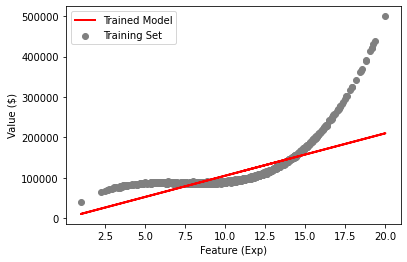

In [9]:
plt.scatter(X_train, y_train, c='gray', label='Training Set');
plt.plot(X_train, lm.predict(X_train), c='red', lw=2., label='Trained Model');
plt.xlabel('Feature (Exp)');
plt.ylabel('Value ($)');
plt.legend();

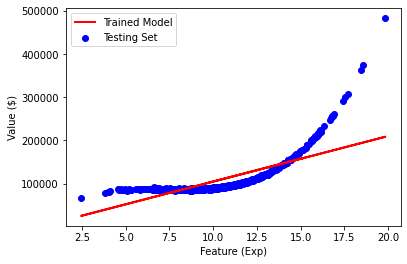

In [10]:
plt.scatter(X_test, y_test, c='blue', label='Testing Set');
plt.plot(X_test, lm.predict(X_test), c='red', lw=2., label='Trained Model');
plt.xlabel('Feature (Exp)');
plt.ylabel('Value ($)');
plt.legend();

In [11]:
print('Slope: {}\t Intercept: {}'.format(lm.coef_, lm.intercept_))

Slope: [10512.83143732]	 Intercept: 0.0


In [12]:
from sklearn.metrics import r2_score

print('R^2: {:.2f}'.format(r2_score(y, lm.predict(X))))

R^2: 0.59


In [13]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2).fit(X_train)
X_poly_train = poly.transform(X_train)

In [14]:
model = LinearRegression().fit(X_poly_train, y_train)

In [15]:
print('Slope: {}\t Intercept: {}'.format(model.coef_, model.intercept_))

Slope: [     0.         -32309.64831991   2067.58378262]	 Intercept: 201787.19860539396


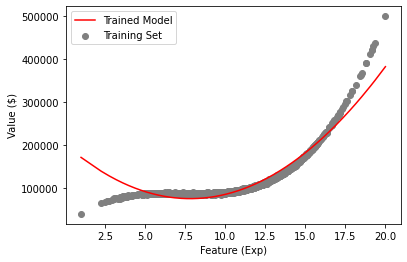

In [16]:
plt.scatter(X_train, y_train, c='gray', label='Training Set');
plt.plot(np.sort(X_train, axis=0), model.predict(np.sort(X_poly_train, axis=0)), c='red', label='Trained Model');
plt.xlabel('Feature (Exp)');
plt.ylabel('Value ($)');
plt.legend();

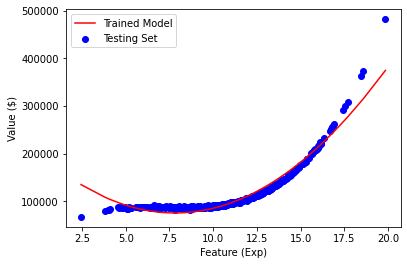

In [17]:
X_poly_test = poly.transform(X_test)

plt.scatter(X_test, y_test, c='blue', label='Testing Set');
plt.plot(np.sort(X_test, axis=0), model.predict(np.sort(X_poly_test, axis=0)), c='red', label='Trained Model');
plt.xlabel('Feature (Exp)');
plt.ylabel('Value ($)');
plt.legend();

In [18]:
poly = PolynomialFeatures(degree=5).fit(X_train)
X_poly_train = poly.transform(X_train)
X_poly_test = poly.transform(X_test)

model = LinearRegression().fit(X_poly_train, y_train)
print('Slope: {}\t Intercept: {}'.format(model.coef_, model.intercept_))

Slope: [ 0.00000000e+00  3.29467395e+04 -4.70081543e+03  2.29218915e+02
 -1.30641279e+00  2.62683115e-02]	 Intercept: 11373.504503954726


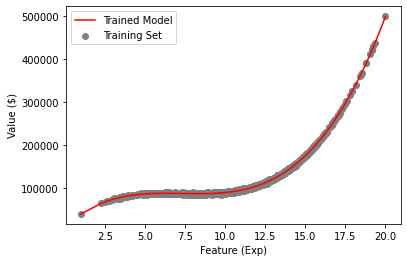

In [19]:
plt.scatter(X_train, y_train, c='gray', label='Training Set');
plt.plot(np.sort(X_train, axis=0), model.predict(np.sort(X_poly_train, axis=0)), c='red', label='Trained Model');
plt.xlabel('Feature (Exp)');
plt.ylabel('Value ($)');
plt.legend();

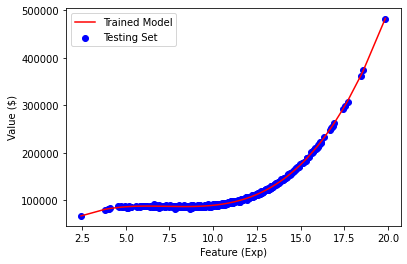

In [20]:
plt.scatter(X_test, y_test, c='blue', label='Testing Set');
plt.plot(np.sort(X_test, axis=0), model.predict(np.sort(X_poly_test, axis=0)), c='red', label='Trained Model');
plt.xlabel('Feature (Exp)');
plt.ylabel('Value ($)');
plt.legend();

## Example 2: Economy Data

In [21]:
df = pd.read_csv('../data/economies_of_scale.csv')
df.head(4)

,Number of Units,Manufacturing Cost
0,1.000000,95.066056
1,1.185994,96.531750
2,1.191499,73.661311
3,1.204771,95.566843


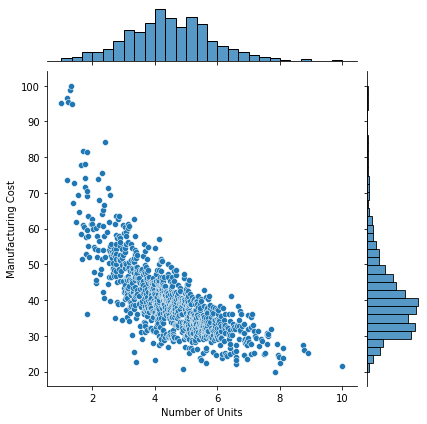

In [22]:
sns.jointplot(x='Number of Units', y='Manufacturing Cost', data=df);

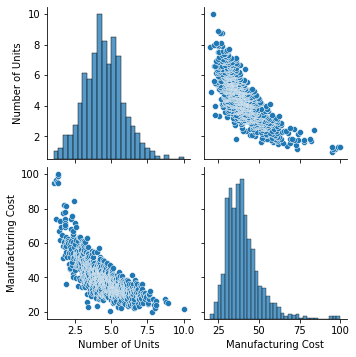

In [23]:
sns.pairplot(df);

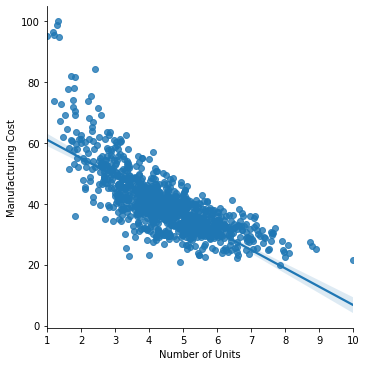

In [24]:
sns.lmplot(x='Number of Units', y='Manufacturing Cost', data=df);

In [25]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [26]:
poly = PolynomialFeatures(degree=2).fit(X_train)
X_poly_train = poly.transform(X_train)
X_poly_test = poly.transform(X_test)

model = LinearRegression().fit(X_poly_train, y_train)
print('Slope: {}\t Intercept: {}'.format(model.coef_, model.intercept_))

Slope: [  0.         -17.88592504   1.27304105]	 Intercept: 92.33914437184869


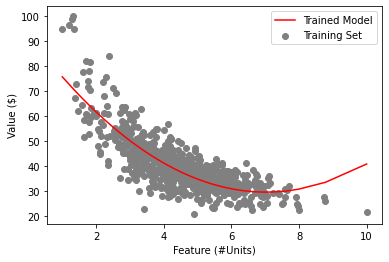

In [27]:
plt.scatter(X_train, y_train, c='gray', label='Training Set');
plt.plot(np.sort(X_train, axis=0), model.predict(np.sort(X_poly_train, axis=0)), c='red', label='Trained Model');
plt.xlabel('Feature (#Units)');
plt.ylabel('Value ($)');
plt.legend();

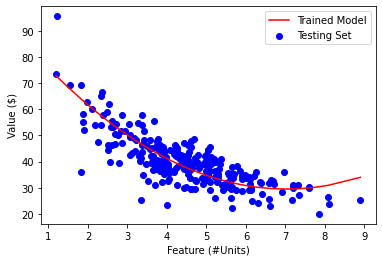

In [28]:
plt.scatter(X_test, y_test, c='blue', label='Testing Set');
plt.plot(np.sort(X_test, axis=0), model.predict(np.sort(X_poly_test, axis=0)), c='red', label='Trained Model');
plt.xlabel('Feature (#Units)');
plt.ylabel('Value ($)');
plt.legend();

In [29]:
poly = PolynomialFeatures(degree=3).fit(X_train)
X_poly_train = poly.transform(X_train)
X_poly_test = poly.transform(X_test)

model = LinearRegression().fit(X_poly_train, y_train)
print('Slope: {}\t Intercept: {}'.format(model.coef_, model.intercept_))

Slope: [  0.         -34.61308519   5.02267875  -0.25666442]	 Intercept: 114.67328213422951


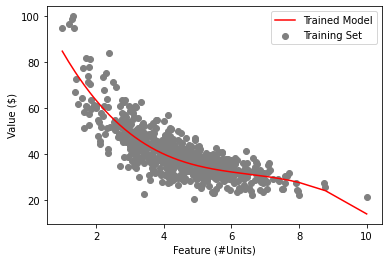

In [30]:
plt.scatter(X_train, y_train, c='gray', label='Training Set');
plt.plot(np.sort(X_train, axis=0), model.predict(np.sort(X_poly_train, axis=0)), c='red', label='Trained Model');
plt.xlabel('Feature (#Units)');
plt.ylabel('Value ($)');
plt.legend();

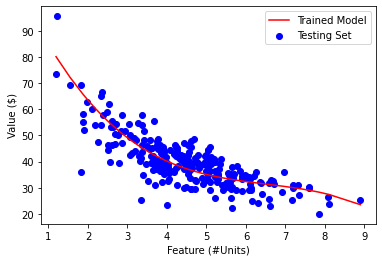

In [31]:
plt.scatter(X_test, y_test, c='blue', label='Testing Set');
plt.plot(np.sort(X_test, axis=0), model.predict(np.sort(X_poly_test, axis=0)), c='red', label='Trained Model');
plt.xlabel('Feature (#Units)');
plt.ylabel('Value ($)');
plt.legend();